# Análise de Dados e Visualização para Tomada de Decisões em Publicidade

In [519]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from decimal import Decimal

## Exploração dos Dados

In [520]:
# Carregar o dataset
df_mkt = pd.read_csv('dados/dados_mkt.csv', delimiter = ';')

In [521]:
# Exploração inicial dos dados
df_mkt.head()

,advertiserName,date,creativeType,deviceCategoryName,totalLineItemLevelImpressions,totalLineItemLevelClicks,totalLineItemLevelCtr,clickThroughConversions,viewThroughConversions
0,Cliente 1,02/06/2023,Custom,SmartTV,11983,349,"0,02912",204,369
1,Cliente 1,02/06/2023,Custom template,Smartphone,12507,112,"0,00895",21,368
2,Cliente 1,02/06/2023,Programmatic,Tablet,29909,488,"0,01632",97,327
3,Cliente 1,02/06/2023,DoubleClick Rich Media,SmartTV,39189,172,"0,00439",22,256
4,Cliente 1,02/06/2023,Video creative sets,Desktop,41458,362,"0,00873",325,63


In [522]:
# Verificação da dimensão do dataset, sobre os tipos de dados, se existem valores nulos e linhas vazias
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   advertiserName                 7000 non-null   object
 1   date                           7000 non-null   object
 2   creativeType                   7000 non-null   object
 3   deviceCategoryName             7000 non-null   object
 4   totalLineItemLevelImpressions  7000 non-null   int64 
 5   totalLineItemLevelClicks       7000 non-null   int64 
 6   totalLineItemLevelCtr          7000 non-null   object
 7   clickThroughConversions        7000 non-null   int64 
 8   viewThroughConversions         7000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 492.3+ KB


In [523]:
# Transformar a coluna Ctr em decimal
print(df_mkt[['totalLineItemLevelCtr']])

def clean_and_convert(value):
    # Remova todos os caracteres não numéricos, exceto o último ponto (caso exista)
    numeric_part = ''.join(filter(lambda x: x.isdigit() or x == '.' or x == ',', value))
    
    # Substitua vírgulas por pontos (para formatos numéricos europeus)
    numeric_part = numeric_part.replace(',', '.')
    
    # Use a biblioteca Decimal para converter
    return Decimal(numeric_part)

# Aplicar a função para converter a coluna totalLineItemLevelCtr
df_mkt['totalLineItemLevelCtr'] = df_mkt['totalLineItemLevelCtr'].apply(clean_and_convert)

print(df_mkt[['totalLineItemLevelCtr']])

     totalLineItemLevelCtr
0                  0,02912
1                  0,00895
2                  0,01632
3                  0,00439
4                  0,00873
...                    ...
6995               0,00270
6996               0,17433
6997               0,00703
6998               0,01292
6999               0,00742

[7000 rows x 1 columns]
     totalLineItemLevelCtr
0                  0.02912
1                  0.00895
2                  0.01632
3                  0.00439
4                  0.00873
...                    ...
6995               0.00270
6996               0.17433
6997               0.00703
6998               0.01292
6999               0.00742

[7000 rows x 1 columns]


In [524]:
# Transformar a coluna de CTR em float
df_mkt['totalLineItemLevelCtr'] = df_mkt['totalLineItemLevelCtr'].astype(float)

#Verificar os tipos dos dados
df_mkt.dtypes

advertiserName                    object
date                              object
creativeType                      object
deviceCategoryName                object
totalLineItemLevelImpressions      int64
totalLineItemLevelClicks           int64
totalLineItemLevelCtr            float64
clickThroughConversions            int64
viewThroughConversions             int64
dtype: object

## Análise Descritiva

In [525]:
# Qual é a média de conversões por tipo de criativo?
conversao_media_criativo = df_mkt.groupby('creativeType')

conversao_media_criativo = conversao_media_criativo[['clickThroughConversions', 'viewThroughConversions']].mean()

# Encontre o maior valor em Conversões diretas (oriundas de clique)
max_click_through_category = conversao_media_criativo['clickThroughConversions'].idxmax()
max_click_through_conversions = conversao_media_criativo['clickThroughConversions'].max()

# Encontre o menor valor em Conversões diretas
min_click_through_category = conversao_media_criativo['clickThroughConversions'].idxmin()
min_click_through_conversions = conversao_media_criativo['clickThroughConversions'].min()

# Encontre o maior valor em Conversões indiretas (não relacionadas ao último clique)
max_view_through_category = conversao_media_criativo['viewThroughConversions'].idxmax()
max_view_through_conversions = conversao_media_criativo['viewThroughConversions'].max()

# Encontre o menor valor em Conversões indiretas
min_view_through_category = conversao_media_criativo['viewThroughConversions'].idxmin()
min_view_through_conversions = conversao_media_criativo['viewThroughConversions'].min()

# Qual é a média de conversões por tipo de criativo? E quais são os tipos de criativo mais e menos eficazes em termos de conversões?
print(conversao_media_criativo)

print("Criativo com maior valor médio de conversões diretas (oriundas de clique):", max_click_through_category)

print("Criativo com menor valor médio de conversões diretas (oriundas de clique):", min_click_through_category)

print("Criativo com maior valor médio de Conversões indiretas (não relacionadas ao último clique):", max_view_through_category)

print("Criativo com menor valor médio de Conversões indiretas (não relacionadas ao último clique):", min_view_through_category)

                        clickThroughConversions  viewThroughConversions
creativeType                                                           
Custom                               120.087126              248.613784
Custom template                      135.234583              255.675937
DoubleClick Rich Media               118.611321              250.001258
HTML5                                129.979747              245.181013
Image                                124.820253              260.121519
Other                                127.217808              250.510959
Programmatic                         123.594221              251.548995
Third-party                          127.568831              255.092208
Video creative sets                  123.476126              246.798090
Criativo com maior valor médio de conversões diretas (oriundas de clique): Custom template
Criativo com menor valor médio de conversões diretas (oriundas de clique): DoubleClick Rich Media
Criativo com maior 

In [526]:
# Qual é a média de conversões por tipo de dispositivo?
conversao_media_dispositivo = df_mkt.groupby('deviceCategoryName')

conversao_media_dispositivo = conversao_media_dispositivo[['clickThroughConversions', 'viewThroughConversions']].mean()

# Encontre o maior valor em Conversões diretas (oriundas de clique)
max_click_through_category = conversao_media_dispositivo['clickThroughConversions'].idxmax()
max_click_through_conversions = conversao_media_dispositivo['clickThroughConversions'].max()

# Encontre o menor valor em Conversões diretas
min_click_through_category = conversao_media_dispositivo['clickThroughConversions'].idxmin()
min_click_through_conversions = conversao_media_dispositivo['clickThroughConversions'].min()

# Encontre o maior valor em Conversões indiretas (não relacionadas ao último clique)
max_view_through_category = conversao_media_dispositivo['viewThroughConversions'].idxmax()
max_view_through_conversions = conversao_media_dispositivo['viewThroughConversions'].max()

# Encontre o menor valor em Conversões indiretas
min_view_through_category = conversao_media_dispositivo['viewThroughConversions'].idxmin()
min_view_through_conversions = conversao_media_dispositivo['viewThroughConversions'].min()

# Qual é a média de conversões por tipo de dispositivo? E quais são os tipos de dispositivo mais e menos eficazes em termos de conversões?
print(conversao_media_dispositivo)

print("Dispositivo com maior valor médio de conversões diretas (oriundas de clique):", max_click_through_category)

print("Dispositivo com menor valor médio de conversões diretas (oriundas de clique):", min_click_through_category)

print("Dispositivo com maior valor médio de Conversões indiretas (não relacionadas ao último clique):", max_view_through_category)

print("Dispositivo com menor valor médio de Conversões indiretas (não relacionadas ao último clique):", min_view_through_category)

                    clickThroughConversions  viewThroughConversions
deviceCategoryName                                                 
Desktop                          126.420686              251.065078
SmartTV                          126.172043              251.552349
Smartphone                       125.402174              258.073227
Tablet                           124.739796              245.640590
Dispositivo com maior valor médio de conversões diretas (oriundas de clique): Desktop
Dispositivo com menor valor médio de conversões diretas (oriundas de clique): Tablet
Dispositivo com maior valor médio de Conversões indiretas (não relacionadas ao último clique): Smartphone
Dispositivo com menor valor médio de Conversões indiretas (não relacionadas ao último clique): Tablet


#### Existe uma tendência sazonal nas conversões?

In [527]:
# Transformar a coluna 'date' em datetime
df_mkt['date'] = pd.to_datetime(df_mkt['date'], format='%d/%m/%Y')

# Verificar
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   advertiserName                 7000 non-null   object        
 1   date                           7000 non-null   datetime64[ns]
 2   creativeType                   7000 non-null   object        
 3   deviceCategoryName             7000 non-null   object        
 4   totalLineItemLevelImpressions  7000 non-null   int64         
 5   totalLineItemLevelClicks       7000 non-null   int64         
 6   totalLineItemLevelCtr          7000 non-null   float64       
 7   clickThroughConversions        7000 non-null   int64         
 8   viewThroughConversions         7000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 492.3+ KB


In [528]:
# Indexar a coluna date para trabalhar com série temporal
df_mkt_ts = df_mkt.copy()
df_mkt_ts.set_index('date', inplace = True)
df_mkt_ts.info()
df_mkt_ts.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7000 entries, 2023-06-02 to 2023-08-30
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   advertiserName                 7000 non-null   object 
 1   creativeType                   7000 non-null   object 
 2   deviceCategoryName             7000 non-null   object 
 3   totalLineItemLevelImpressions  7000 non-null   int64  
 4   totalLineItemLevelClicks       7000 non-null   int64  
 5   totalLineItemLevelCtr          7000 non-null   float64
 6   clickThroughConversions        7000 non-null   int64  
 7   viewThroughConversions         7000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 492.2+ KB


,advertiserName,creativeType,deviceCategoryName,totalLineItemLevelImpressions,totalLineItemLevelClicks,totalLineItemLevelCtr,clickThroughConversions,viewThroughConversions
date,,,,,,,,
2023-06-02,Cliente 1,Custom,SmartTV,11983,349,0.02912,204,369
2023-06-02,Cliente 1,Custom template,Smartphone,12507,112,0.00895,21,368
2023-06-02,Cliente 1,Programmatic,Tablet,29909,488,0.01632,97,327
2023-06-02,Cliente 1,DoubleClick Rich Media,SmartTV,39189,172,0.00439,22,256
2023-06-02,Cliente 1,Video creative sets,Desktop,41458,362,0.00873,325,63


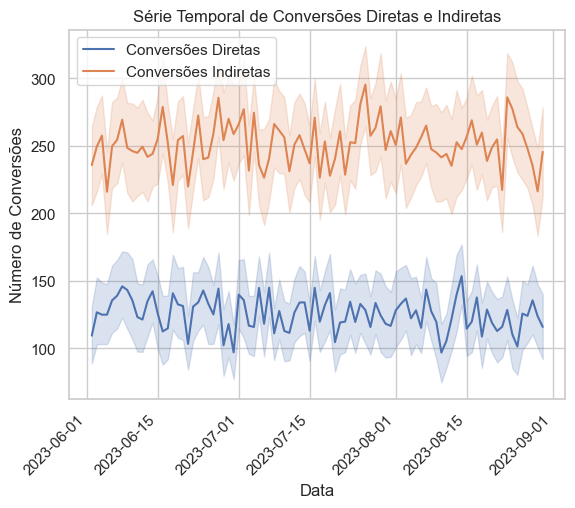

In [529]:
# Plot das conversões diretas e indiretas ao longo do tempo
sns.lineplot(x=df_mkt_ts.index, y=df_mkt_ts['clickThroughConversions'], label="Conversões Diretas")
sns.lineplot(x=df_mkt_ts.index, y=df_mkt_ts['viewThroughConversions'], label="Conversões Indiretas")

# Configuração do gráfico
plt.title('Série Temporal de Conversões Diretas e Indiretas')
plt.xlabel('Data')
plt.ylabel('Número de Conversões')
plt.legend()

# Rotacionar os rótulos do eixo x na diagonal
plt.xticks(rotation=45, ha="right")

plt.show()

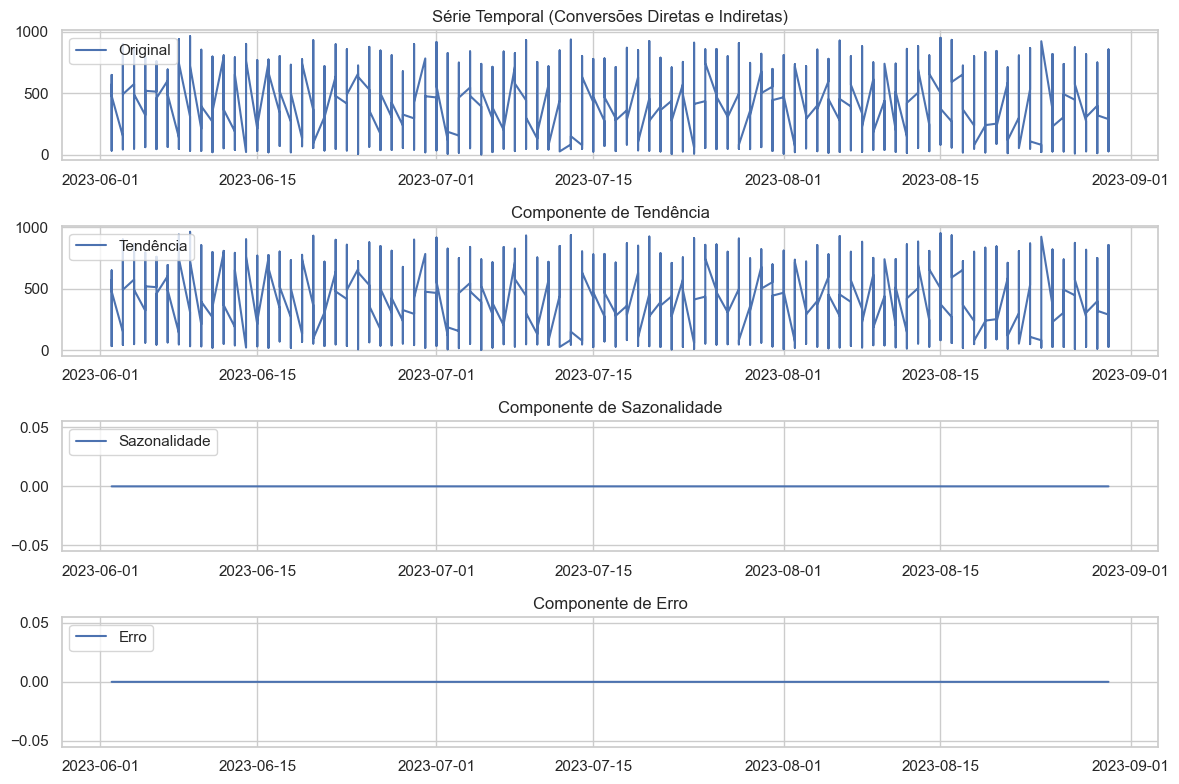

In [530]:
# Soma as colunas de conversões diretas e indiretas para obter o total de conversões
df_mkt_ts['sumConversions'] = df_mkt_ts['clickThroughConversions'] + df_mkt_ts['viewThroughConversions']

# Decomposição
decomposition = sm.tsa.seasonal_decompose(df_mkt_ts['sumConversions'], model='additive', period=1)

# Adicionar os resultados da decomposição como colunas no DataFrame original
df_mkt_ts['Tendencia'] = decomposition.trend
df_mkt_ts['Sazonalidade'] = decomposition.seasonal
df_mkt_ts['Erro'] = decomposition.resid

# Plot
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_mkt_ts['sumConversions'], label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal (Conversões Diretas e Indiretas)')

plt.subplot(412)
plt.plot(df_mkt_ts['Tendencia'], label='Tendência')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(df_mkt_ts['Sazonalidade'], label='Sazonalidade')
plt.legend(loc='upper left')
plt.title('Componente de Sazonalidade')

plt.subplot(414)
plt.plot(df_mkt_ts['Erro'], label='Erro')
plt.legend(loc='upper left')
plt.title('Componente de Erro')

plt.tight_layout()
plt.show()

In [531]:
from statsmodels.tsa.stattools import adfuller

# Realize o Teste de Dickey-Fuller Sazonal
result = adfuller(df_mkt_ts['sumConversions'], autolag='AIC')

# Exiba o resultado do teste
print('Estatísticas do Teste de Dickey-Fuller:')
print(f'Estatística do Teste: {result[0]}')
print(f'Valor-p: {result[1]}')
print(f'Lags Usados: {result[2]}')
print(f'Número de Observações Usadas: {result[3]}')
print('Resultado do Teste:')
if result[1] <= 0.05:
    print('O valor-p é menor ou igual a 0.05. Há evidências estatísticas de que os dados são estacionários.')
else:
    print('O valor-p é maior que 0.05. Não há evidências estatísticas de que os dados são estacionários.')

Estatísticas do Teste de Dickey-Fuller:
Estatística do Teste: -46.535486360415206
Valor-p: 0.0
Lags Usados: 2
Número de Observações Usadas: 6997
Resultado do Teste:
O valor-p é menor ou igual a 0.05. Há evidências estatísticas de que os dados são estacionários.


Com base no valor-p igual a zero, concluo que há evidências estatísticas fortes de que os dados são estacionários. Isso significa que não há evidência de sazonalidade ou tendência significativa nos dados.

#### Há algum outlier nos dados que mereça atenção?

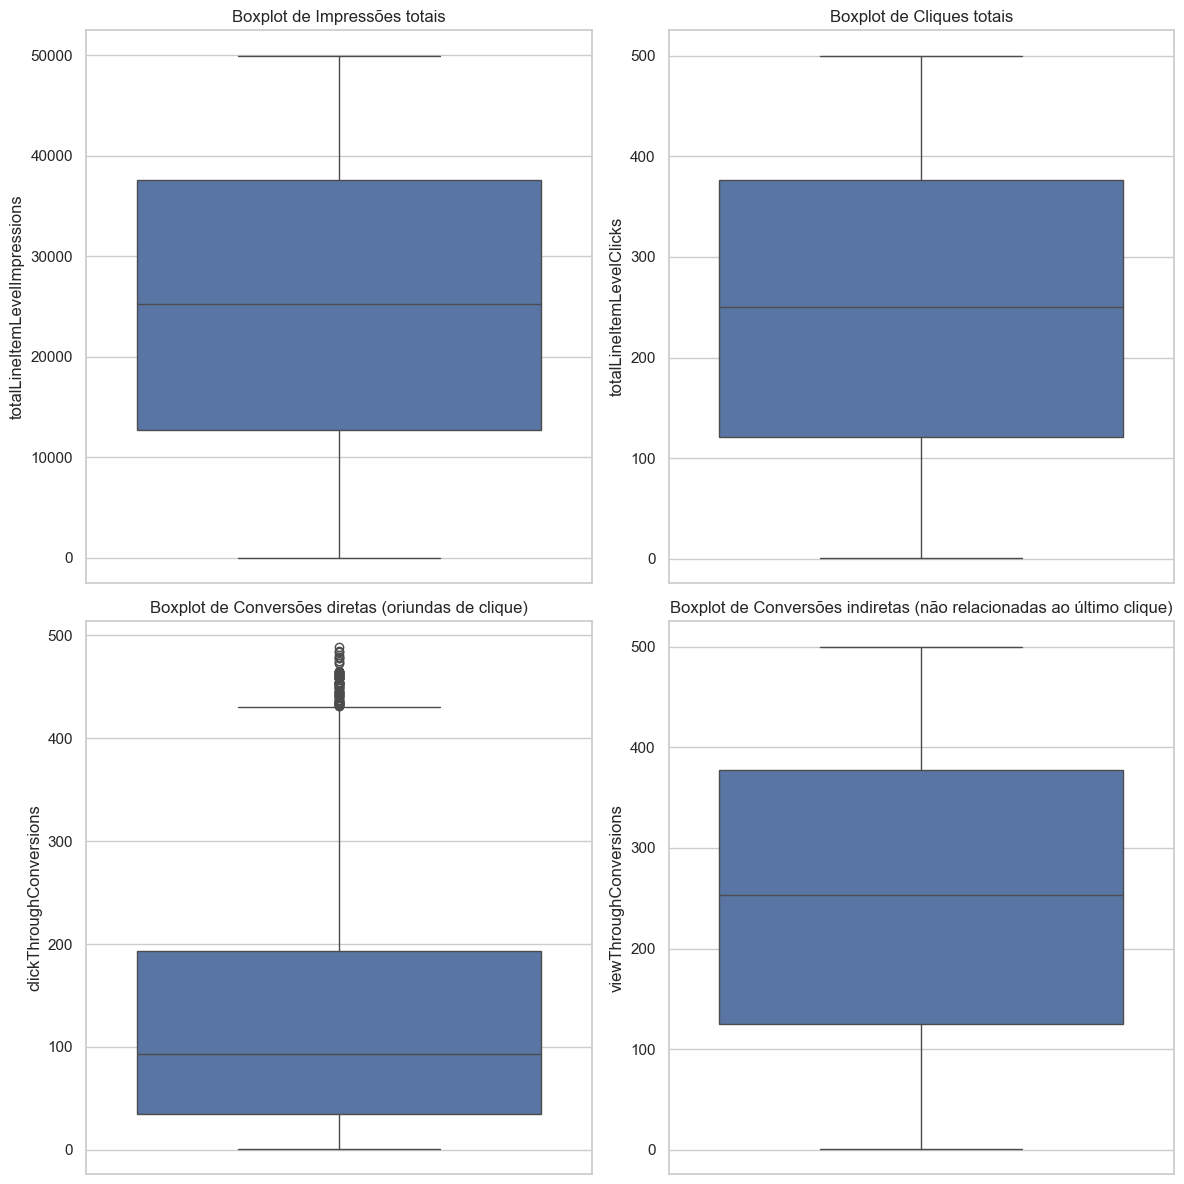

In [532]:
# Lista de colunas com dados para os boxplots
outlier_col = ['totalLineItemLevelImpressions', 'totalLineItemLevelClicks', 'clickThroughConversions', 'viewThroughConversions', 'totalLineItemLevelCtr']

# Dicionário para mapear os títulos
titles = {
    'totalLineItemLevelImpressions': 'Impressões totais',
    'totalLineItemLevelClicks': 'Cliques totais',
    'clickThroughConversions': 'Conversões diretas (oriundas de clique)',
    'viewThroughConversions': 'Conversões indiretas (não relacionadas ao último clique)'
}

# Crie uma figura com 2 linhas e 2 colunas para acomodar 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Itere sobre as colunas e crie um boxplot em cada subplot
for i, col in enumerate(outlier_col[:4]):
    sns.boxplot(data=df_mkt, y=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Boxplot de {titles[col]}')  # Usando os títulos mapeados

# Ajuste o layout
plt.tight_layout()

# Exiba a figura
plt.show()

In [533]:
# Verificação de outliers
Q1 = df_mkt[outlier_col].quantile(0.25)
Q3 = df_mkt[outlier_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df_mkt[outlier_col] < lower_bound) | (df_mkt[outlier_col] > upper_bound)).any(axis=1)
outlier_count = outliers.sum()
print(f'Número de outliers: {outlier_count}')

Número de outliers: 873


Todos os outliers, conforme o boxplot, estão presentes em Conversões diretas (oriundas de clique)

## Visualização de Dados

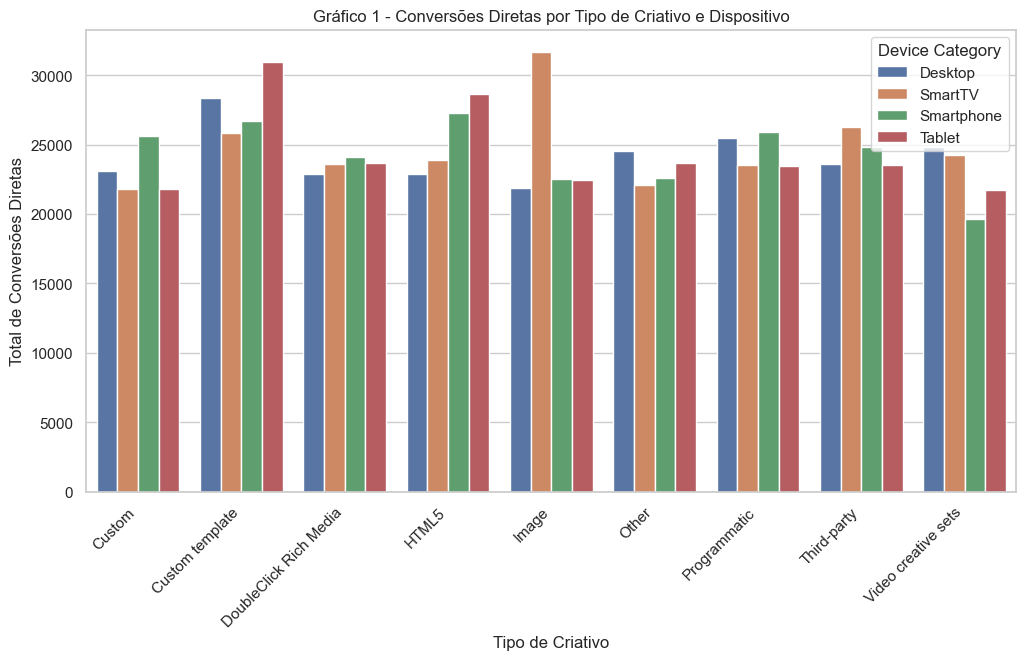

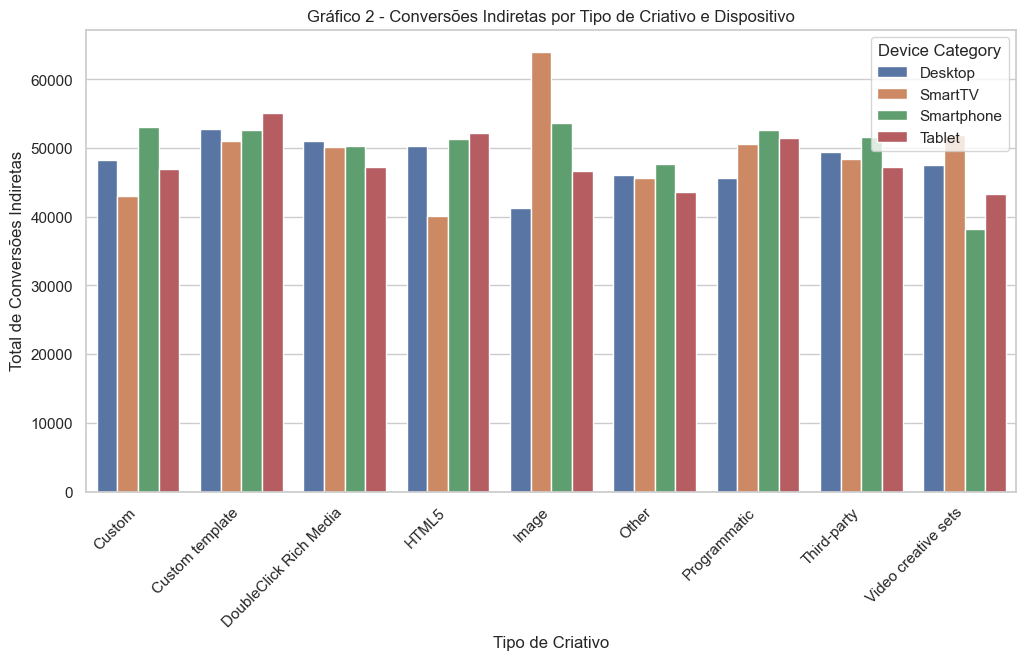

In [534]:
# Agrupe os dados por 'creativeType' e 'deviceCategoryName' e calcule as somas das métricas
grouped_data = df_mkt.groupby(['creativeType', 'deviceCategoryName']).agg({
    'clickThroughConversions': 'sum',
    'viewThroughConversions': 'sum'
}).reset_index()

# Crie um gráfico de barras empilhadas para 'clickThroughConversions'
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='creativeType', y='clickThroughConversions', data=grouped_data, hue='deviceCategoryName')

# Configure o título e rótulos dos eixos
plt.title('Gráfico 1 - Conversões Diretas por Tipo de Criativo e Dispositivo')
plt.xlabel('Tipo de Criativo')
plt.ylabel('Total de Conversões Diretas')

# Gráfico conversões diretas
plt.xticks(rotation=45, ha='right')
plt.legend(title='Device Category', loc='upper right')

# Crie um gráfico de barras empilhadas para 'viewThroughConversions'
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='creativeType', y='viewThroughConversions', data=grouped_data, hue='deviceCategoryName')

# Configure o título e rótulos dos eixos
plt.title('Gráfico 2 - Conversões Indiretas por Tipo de Criativo e Dispositivo')
plt.xlabel('Tipo de Criativo')
plt.ylabel('Total de Conversões Indiretas')

# Gráfico conversões indiretas
plt.xticks(rotation=45, ha='right')
plt.legend(title='Device Category', loc='upper right')

# Plot
plt.show()

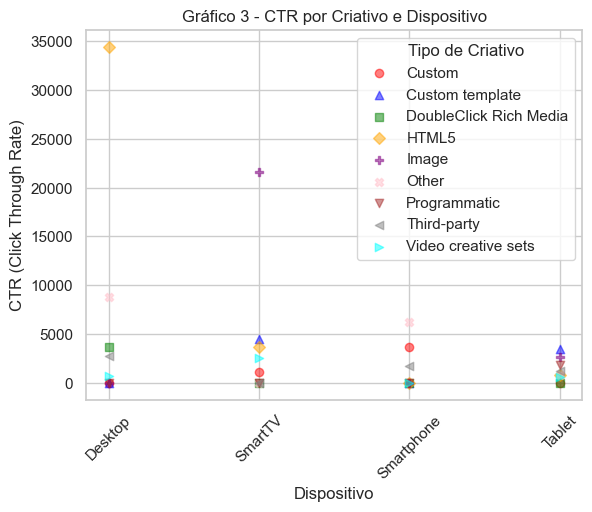

In [535]:
# Agrupar por 'creativeType' e 'deviceCategoryName' e calcular a média da CTR
ctr_by_category = df_mkt.groupby(['creativeType', 'deviceCategoryName'])['totalLineItemLevelCtr'].mean().reset_index()

# Definir cores
colors = {
    'Custom': 'red',
    'Custom template': 'blue',
    'DoubleClick Rich Media': 'green',
    'HTML5': 'orange',
    'Image': 'purple',
    'Other': 'pink',
    'Programmatic': 'brown',
    'Third-party': 'gray',
    'Video creative sets': 'cyan',
}

# Definir marcadores
markers = {
    'Custom': 'o',
    'Custom template': '^',
    'DoubleClick Rich Media': 's',
    'HTML5': 'D',
    'Image': 'P',
    'Other': 'X',
    'Programmatic': 'v',
    'Third-party': '<',
    'Video creative sets': '>',
}

# Itere sobre os grupos e plote os pontos
for key, group in ctr_by_category.groupby('creativeType'):
    plt.scatter(
        group['deviceCategoryName'],
        group['totalLineItemLevelCtr'],
        label=key,
        color=colors[key],
        marker=markers[key],
        alpha=0.5
    )

# Definir rótulos e título do gráfico
plt.xlabel('Dispositivo')
plt.ylabel('CTR (Click Through Rate)')
plt.title('Gráfico 3 - CTR por Criativo e Dispositivo')
plt.legend(title='Tipo de Criativo')
plt.xticks(rotation=45)

# Plot
plt.show()

# Relatório

Neste relatório, apresentaremos uma análise detalhada das conversões de marketing, abordando os seguintes pontos:

## Avaliação da Eficiência

### Conversões Diretas (oriundas de clique)
- Criativo com maior valor médio de conversões diretas: Custom template
- Criativo com menor valor médio de conversões diretas: DoubleClick Rich Media
- Dispositivo com maior valor médio de conversões diretas: Desktop
- Dispositivo com menor valor médio de conversões diretas: Tablet

### Conversões Indiretas (não relacionadas ao último clique)
- Criativo com maior valor médio de conversões indiretas: Image
- Criativo com menor valor médio de conversões indiretas: HTML5
- Dispositivo com maior valor médio de conversões indiretas: Smartphone
- Dispositivo com menor valor médio de conversões indiretas: Tablet

## Análise de Valores Absolutos

Os valores totais de conversões diretas e indiretas estão disponíveis nos Gráficos 1 e 2, respectivamente, categorizados por criativos e dispositivos. Esses valores não devem ser analisados de maneira isolada, mas sim em conjunto com os resultados obtidos na avaliação de eficiência (médias de conversões), bem como os resultados obtidos na análise de CTR (desempenho de anúncio) abaixo.

## Sazonalidade e Tendências

Não identifiquei evidências de sazonalidade ou tendência significativa nos dados de conversões (diretas + indiretas).

## Outliers

Foi observada a presença de outliers nos dados de conversões diretas (oriundas de clique). É importante avaliar a relevância e o impacto desses valores.

## Análise de CTR (Click Through Rate) e seu impacto em conversões

O CTR é uma métrica importante para avaliar o ROI (Retorno sobre Investimento) de campanhas de marketing e publicidade digital, pois ajuda a determinar se os recursos investidos estão gerando o engajamento desejado.

Conforme observado no Gráfico 3, a combinação de dispositivo com criativo que obteve o melhor CTR foi:

- Desktop + HTML5
- SmartTV + Image
- Smartphone + Other
- Tablet + Custom Template

É importante observar que, embora Desktop + HTML5 tenha o melhor CTR, em conversões diretas, o Desktop foi o que menos converteu com HTML5. SmartTV + Image obteve excelentes resultados tanto em conversões diretas quanto indiretas. Smartphone + Other teve um desempenho padrão em todos os dispositivos, mas se destacou em conversões indiretas. Por fim, Tablet + Custom Template, apesar de ter um alto CTR, ficou em segundo lugar em conversões diretas e em último lugar em conversões indiretas.

Com o intuito de otimizar o direcionamento de nossos esforços, os dados apresentados servem como uma base sólida para adaptar nossas estratégias de marketing de acordo com as necessidades específicas de público-alvo do Cliente.

Os resultados desta análise destacam a importância de avaliar o desempenho de diferentes combinações de criativos e dispositivos. Observar tendências nos ajuda a refinar nossas estratégias e maximizar o retorno sobre o investimento.

É crucial lembrar que o mercado e o comportamento do consumidor estão em constante evolução. Portanto, devemos manter a flexibilidade e estar dispostos a adaptar nossas estratégias à medida que novos insights emergem.